# QUESTION 01

In [17]:
import numpy as np
import scipy.stats as sp

In [18]:
#defining likelihood funtion
def likelihood(obs, predic, error):
    return sp.norm.pdf(obs, loc=predic, scale=error)

In [19]:
#predictions and uncertainities of einstein and newton
e_predic = 1.74
n_predic = e_predic * 0.5
e_error = 0
n_error = 0

In [20]:
#observations and uncertainities of eddington and crommelin
eddi_obs = 1.61
cromm_obs = 1.98
eddi_error = 0.40
cromm_error = 0.16

In [21]:
#calculating liklihoods
e_like = likelihood(eddi_obs, e_predic, eddi_error) * likelihood(cromm_obs, e_predic, cromm_error)
n_like = likelihood(eddi_obs, n_predic, eddi_error) * likelihood(cromm_obs, n_predic, cromm_error)

In [23]:
bayes_factor = e_like/n_like
print("Bayes factor between General Relativity and Newtonian gravity is {:.2f}".format(bayes_factor))

Bayes factor between General Relativity and Newtonian gravity is 48164622958.34


# QUESTION 02

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import emcee
import corner

In [18]:
def fit(theta, x, y, sigma_y):
    a, b, sigma_y = theta
    prior = -np.inf
    
    if sigma_y >= 0:
        prior = np.log(sigma_y)
        prior = prior + np.log(1+ b**2)
        prior = prior * -1
    estm_y = a + b*x
    estm_sigma_y = sigma_y**2 + np.exp(2*sigma_y)* (estm_y**2)
    prior -= 0.5 * np.sum((y-estm_y)**2)/ estm_sigma_y + np.log(estm_sigma_y)
    return prior

In [13]:
dim = 3
burn = 1000
steps = 5000
walkers = 50

np.random.seed(1)

In [14]:
data = np.array([
    [1, 201, 592, 61, 9, -0.84],
    [2, 244, 401, 25, 4, 0.31],
    [3, 47, 583, 38, 11, 0.64],
    [4, 287, 402, 15, 7, -0.27],
    [5, 203, 495, 21, 5, -0.33],
    [6, 58, 173, 15, 9, 0.67],
    [7, 210, 479, 27, 4, -0.02],
    [8, 202, 504, 14, 4, -0.05],
    [9, 198, 510, 30, 11, -0.84],
    [10, 158, 416, 16, 7, -0.69],
    [11, 165, 393, 14, 5, 0.30],
    [12, 201, 442, 25, 5, -0.46],
    [13, 157, 317, 52, 5, -0.03],
    [14, 131, 311, 16, 6, 0.50],
    [15, 166, 400, 34, 6, 0.73],
    [16, 160, 337, 31, 5, -0.52],
    [17, 186, 423, 42, 9, 0.90],
    [18, 125, 334, 26, 8, 0.40],
    [19, 218, 533, 16, 6, -0.78],
    [20, 146, 344, 22, 5, -0.56]
])

In [15]:
x = data[:,1]
y = data[:,2]
sigma_y = data[:,3]

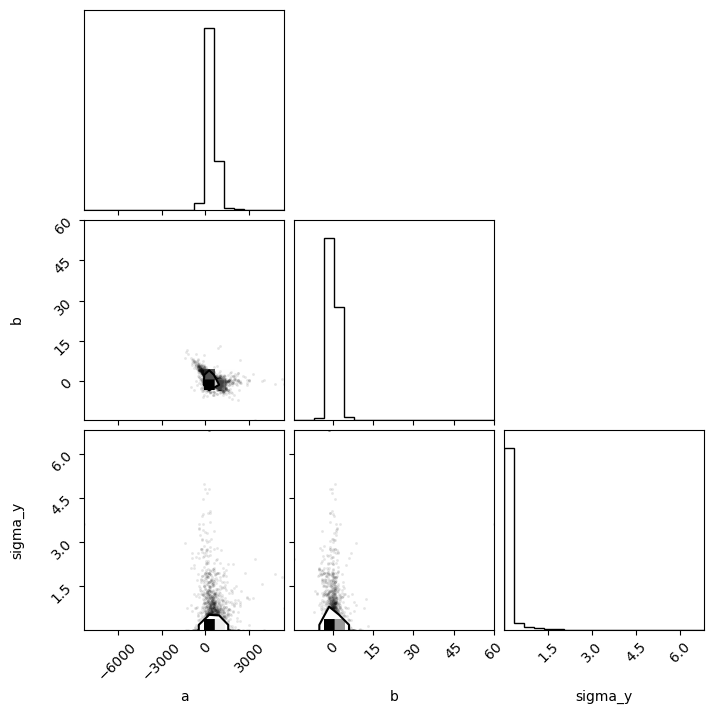

In [21]:
starting_guess = np.random.random((walkers,dim))
sampler = emcee.EnsembleSampler(walkers,dim,fit, args =(x,y, sigma_y))
sampler.run_mcmc(starting_guess,steps)
samples = sampler.get_chain(discard=burn, thin = 15, flat='true')
fig = corner.corner(samples, levels = (0.68,0.95),labels =['a','b','sigma_y'])
plt.show()

# QUESTION 03

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize, stats
import emcee

In [25]:
#following are thge functions defined for optimization
def log_prior(theta):
    m, b = theta
    if -10 < m < 10 and -10 < b < 10:
        return 0
    else:
        return -np.inf

def log_likelihood(theta, x, y):
    m, b = theta
    y_model = m * x + b
    sigma = 1.0
    return -0.5 * np.sum((y - y_model)**2 / sigma**2)

def log_posterior(theta, x, y):
    return log_prior(theta) + log_likelihood(theta, x, y)

In [23]:
#data from the table
data = np.array([[ 0.42, 0.72, 0. , 0.3 , 0.15,
0.09, 0.19, 0.35, 0.4 , 0.54,
0.42, 0.69, 0.2 , 0.88, 0.03,
0.67, 0.42, 0.56, 0.14, 0.2 ],
[ 0.33, 0.41, -0.22, 0.01, -0.05,
-0.05, -0.12, 0.26, 0.29, 0.39, 
0.31, 0.42, -0.01, 0.58, -0.2 ,
0.52, 0.15, 0.32, -0.13, -0.09 ],
[ 0.1 , 0.1 , 0.1 , 0.1 , 0.1 ,
0.1 , 0.1 , 0.1 , 0.1 , 0.1 ,
0.1 , 0.1 , 0.1 , 0.1 , 0.1 ,
0.1 , 0.1 , 0.1 , 0.1 , 0.1 ]])


In [24]:
x, y, sigma_y = data

In [29]:
m_ml, b_ml = np.polyfit(x, y, 1)

In [31]:
dim = 2
walkers = 100
p0 = np.random.rand(walkers, dim) * 20 - 10
sampler = emcee.EnsembleSampler(walkers, dim, log_posterior, args=(x, y))
sampler.run_mcmc(p0, 10000)

samples = sampler.get_chain(discard=1000, thin=50, flat=True)
m_bayes, b_bayes = np.median(samples, axis=0)

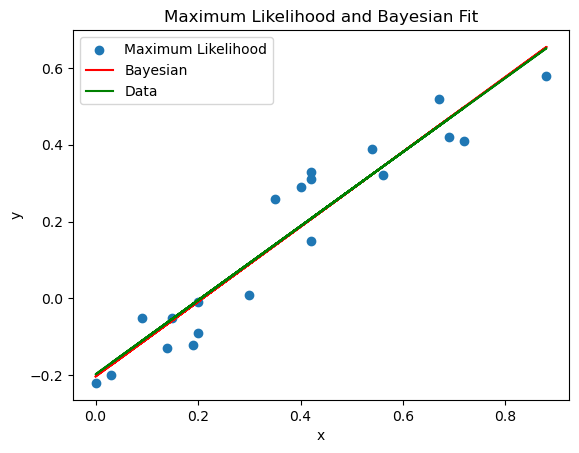

In [32]:
#plot the data and the maximum likelihood line
plt.scatter(x, y)
plt.plot(x, m_ml * x + b_ml, color='red')
#plot the data and the Bayesian line
plt.plot(x, m_bayes * x + b_bayes, color='green')

#title and labels
plt.title('Maximum Likelihood and Bayesian Fit')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(['Maximum Likelihood', 'Bayesian', 'Data'])

plt.show()